In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Activation, Dense, Lambda,Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

Using TensorFlow backend.


In [2]:
datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train_dir = 'data/train'
test_dir = 'data/test'
validation_dir = 'data/test'

In [4]:
image_w = 128
image_h = 128

In [5]:
train_generator = datagen.flow_from_directory(train_dir,
                                             target_size= (image_w,image_h),
                                             batch_size=20,
                                             class_mode='categorical')

Found 99 images belonging to 3 classes.


In [6]:
test_generator = datagen.flow_from_directory(test_dir,
                                             target_size= (image_w,image_h),
                                             batch_size=20,
                                             class_mode='categorical')

Found 24 images belonging to 3 classes.


In [7]:
validation_generator = datagen.flow_from_directory(test_dir,
                                             target_size = (image_w, image_h),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 24 images belonging to 3 classes.


In [8]:
def LeNet(width, height, channels, output):
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(2,2), input_shape=(width, height, channels)))
    
    model.add(Activation('relu'))
    
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=64, kernel_size=(5,5), strides=(2,2)))
    
    model.add(Activation('relu'))
    
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Flatten())
    
    model.add(Dense(100))
    
    model.add(Activation('relu'))
    
    model.add(Dense(output))
    model.add(Activation('softmax'))
    
    return model

In [9]:
print train_generator.classes
print train_generator.samples

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
99


In [10]:
EPOCHS = 20
train_sample = train_generator.samples
validation_sample = validation_generator.samples
test_sample = test_generator.samples

print train_sample
print validation_sample


99
24


In [11]:
model = LeNet(image_w, image_h, 3, 3)

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        2432      
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
__________

In [13]:
batch_size = train_generator.batch_size

print batch_size

20


In [14]:
model.compile(optimizer='adam',
             loss='mse',
             metrics=['accuracy'])

In [15]:
# history = model.fit_generator(train_generator,
#                              steps_per_epoch = train_sample//batch_size,
#                              epochs = EPOCHS,
#                              validation_data = validation_generator,
#                              validation_steps = validation_sample//batch_size)

history = model.fit_generator(train_generator,
                    steps_per_epoch = train_sample//batch_size,
                    epochs = EPOCHS,
                    validation_data = validation_generator,
                    validation_steps = validation_sample//batch_size)

Epoch 1/20
4/4 [==============================] - 15s 4s/step - loss: 0.2111 - acc: 0.5326 - val_loss: 0.2159 - val_acc: 0.4583
Epoch 2/20
4/4 [==============================] - 16s 4s/step - loss: 0.2183 - acc: 0.3750 - val_loss: 0.2139 - val_acc: 0.4167
Epoch 3/20
4/4 [==============================] - 16s 4s/step - loss: 0.1902 - acc: 0.5284 - val_loss: 0.2102 - val_acc: 0.4583
Epoch 4/20
4/4 [==============================] - 14s 4s/step - loss: 0.1991 - acc: 0.4377 - val_loss: 0.2059 - val_acc: 0.4583
Epoch 5/20
4/4 [==============================] - 13s 3s/step - loss: 0.1816 - acc: 0.5750 - val_loss: 0.1986 - val_acc: 0.5833
Epoch 6/20
4/4 [==============================] - 12s 3s/step - loss: 0.1788 - acc: 0.6324 - val_loss: 0.1842 - val_acc: 0.7083
Epoch 7/20
4/4 [==============================] - 13s 3s/step - loss: 0.1380 - acc: 0.7974 - val_loss: 0.1734 - val_acc: 0.6667
Epoch 8/20
4/4 [==============================] - 10s 3s/step - loss: 0.1371 - acc: 0.7206 - val_loss: 0

In [16]:
model.save_weights('modelnrs.h5')

In [17]:
ls

data/  modelnrs.h5  NRSRecognizer.ipynb


In [18]:
%matplotlib inline

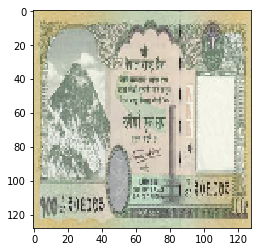

In [38]:
img = load_img('data/test/hundred/hundred.9.jpg',target_size=(image_w,image_h))

plt.imshow(img)

In [39]:
img = np.array(img)/255

print img.shape


(128, 128, 3)


In [40]:
img = np.expand_dims(img, axis = 0)

print img.shape


(1, 128, 128, 3)


In [41]:
fifty = {1,0,0}
hundred = {0,1,0}
ten = {0,0,1}

In [42]:
predict_array = model.predict(img)

print  predict_array

# result = [np.argmax(x) for x in predict_array]

# print len(result)

# if(result[0]==0):
#     print "fifty"
# else:
#     print "hundred"

[[ 0.37469098  0.23619421  0.38911477]]


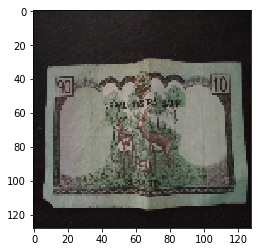

In [45]:
img = load_img('data/test/ten/ten.1.jpg',target_size=(image_w,image_h))

plt.imshow(img)

In [48]:
img2 = np.array(img)/255

print img.shape

(1, 128, 128, 3)


In [49]:
img2 = np.expand_dims(img2, axis = 0)

print img.shape

(1, 128, 128, 3)


In [50]:
predict_ten = model.predict(img)
print predict_ten

[[ 0.34914798  0.30500236  0.34584969]]
